<a href="https://colab.research.google.com/github/Valtern/machinelearningsmt5/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 1

In [160]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [161]:
df = pd.read_csv('/content/drive/MyDrive/MLearning/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [163]:
# Features Selection
X = df.iloc[:, 1:-1] # slice the features
y = df.iloc[:, -1] # this is the labels (we don't need it)

In [164]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


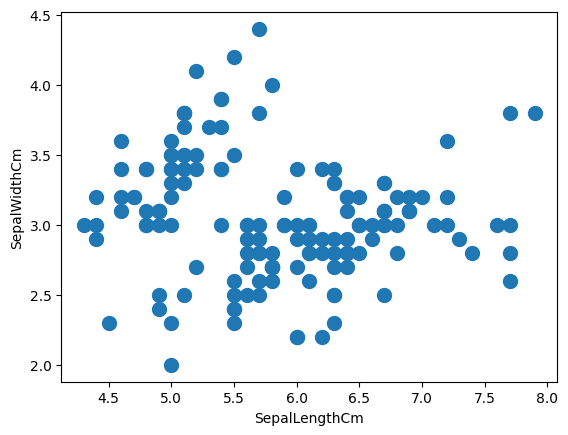

In [165]:
# Make a scatterplot using
# SepalLengthCm and SepalWidthCm
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [166]:
# Build a K-Means Model
# Based on visual inspection using scatterplot,
# we can assumpt that the data has 2 cluster
# (even though, from the label, there are 3 labels in this data)

from sklearn.cluster import KMeans

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

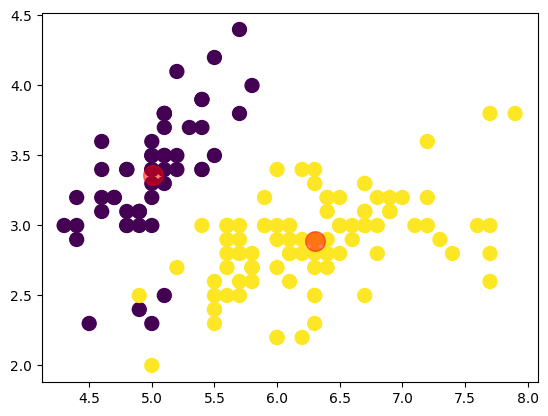

In [167]:
# Plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [168]:
# Print SSE value
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


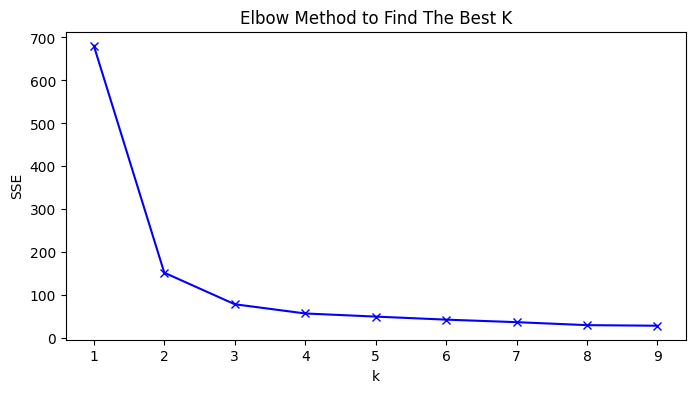

In [169]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

**Just some extra practice**

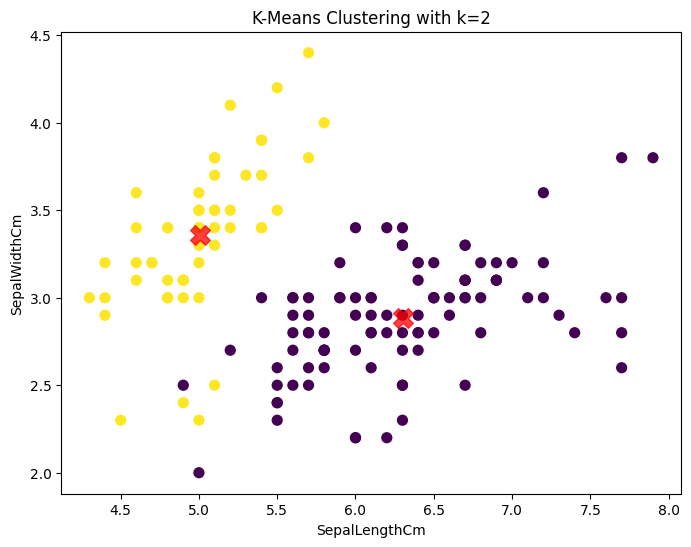

SSE for k=2: 152.36870647733915


In [170]:
# Initiate K-Means object with number of clusters = 2
cl_kmeans_k2 = KMeans(n_clusters=2, random_state=42, n_init=10)

# Fit and predict the clusters
y_kmeans_k2 = cl_kmeans_k2.fit_predict(X)

# Visualize the clustering result for k=2
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans_k2, s=50, cmap='viridis')
centers = cl_kmeans_k2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering with k=2')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

# Print SSE value for k=2
print(f'SSE for k=2: {cl_kmeans_k2.inertia_}')

In [171]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for k=2
score_k2 = silhouette_score(X, y_kmeans_k2)
print(f'Silhouette Score for k=2: {score_k2:.4f}')

Silhouette Score for k=2: 0.6808



--- Building final model with optimal k=3 ---


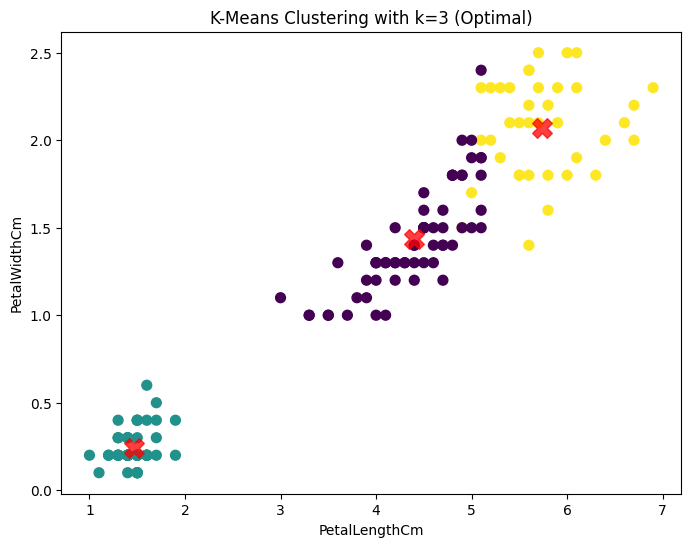

SSE for k=3: 78.9408
Silhouette Score for k=3: 0.5526


In [172]:
# --- Re-building the model with the optimal k=3 ---
print("\n--- Building final model with optimal k=3 ---")
cl_kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans_k3 = cl_kmeans_k3.fit_predict(X)

# Visualize the clustering result for k=3
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=y_kmeans_k3, s=50, cmap='viridis') # Plotting petals this time
centers = cl_kmeans_k3.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering with k=3 (Optimal)')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

# Evaluate the optimal model
sse_k3 = cl_kmeans_k3.inertia_
score_k3 = silhouette_score(X, y_kmeans_k3)

print(f'SSE for k=3: {sse_k3:.4f}')
print(f'Silhouette Score for k=3: {score_k3:.4f}')

# LAB 2

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [174]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

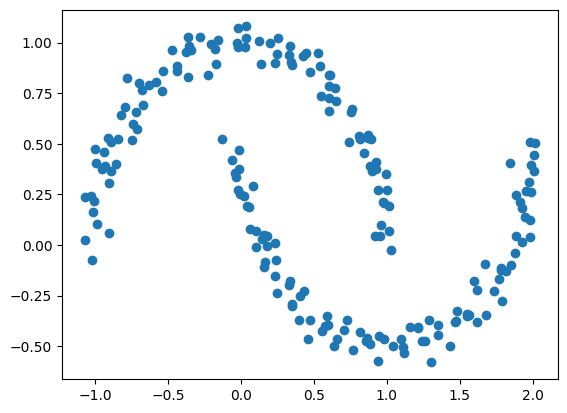

In [175]:
plt.scatter(X[:, 0], X[:, 1])

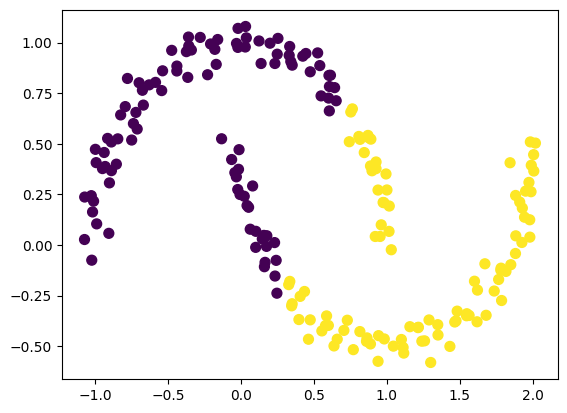

In [176]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0)
cluster = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

In [177]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster))

0.49215648268306905


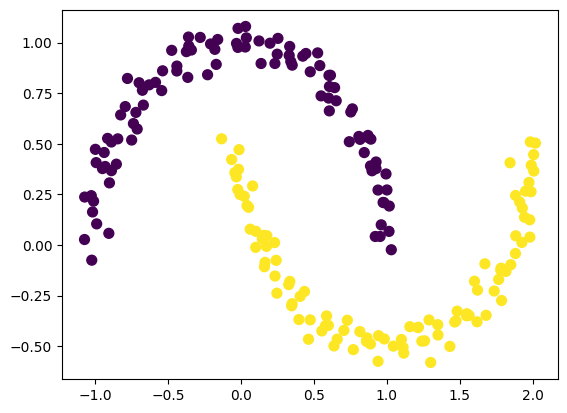

In [178]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

In [179]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster_db))

# Result: 0.32585318950197517

0.32585318950197517


In [180]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

# Result
# Davies-Bouldin Index: 1.1622685374061352

Davies-Bouldin Index: 1.1622685374061352


# LAB 3

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

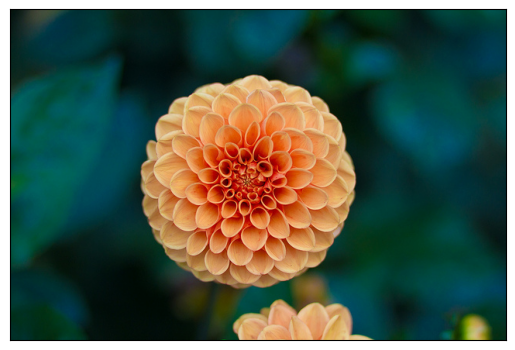

In [182]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

In [183]:
# Check shape
print(flower.shape)

# Normalize color
data = flower / 255.0

# Reshape
data = data.reshape(427 * 640, 3) # turn to 1D

print(data.shape)

(427, 640, 3)
(273280, 3)


In [184]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

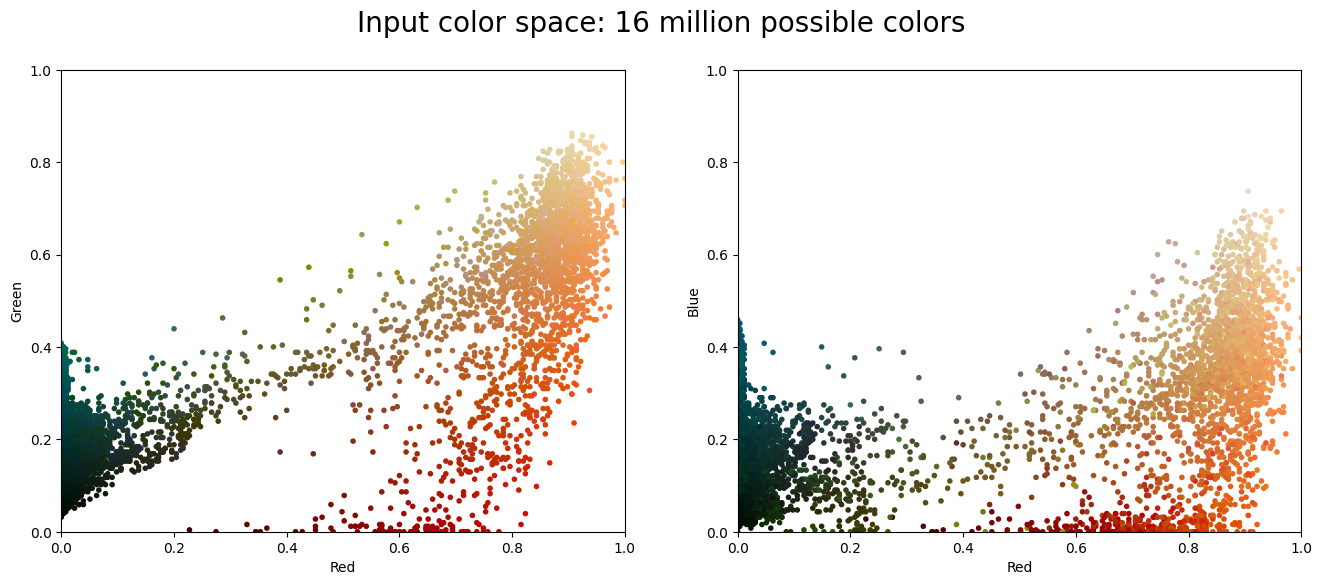

In [185]:
plot_pixels(data, title='Input color space: 16 million possible colors')

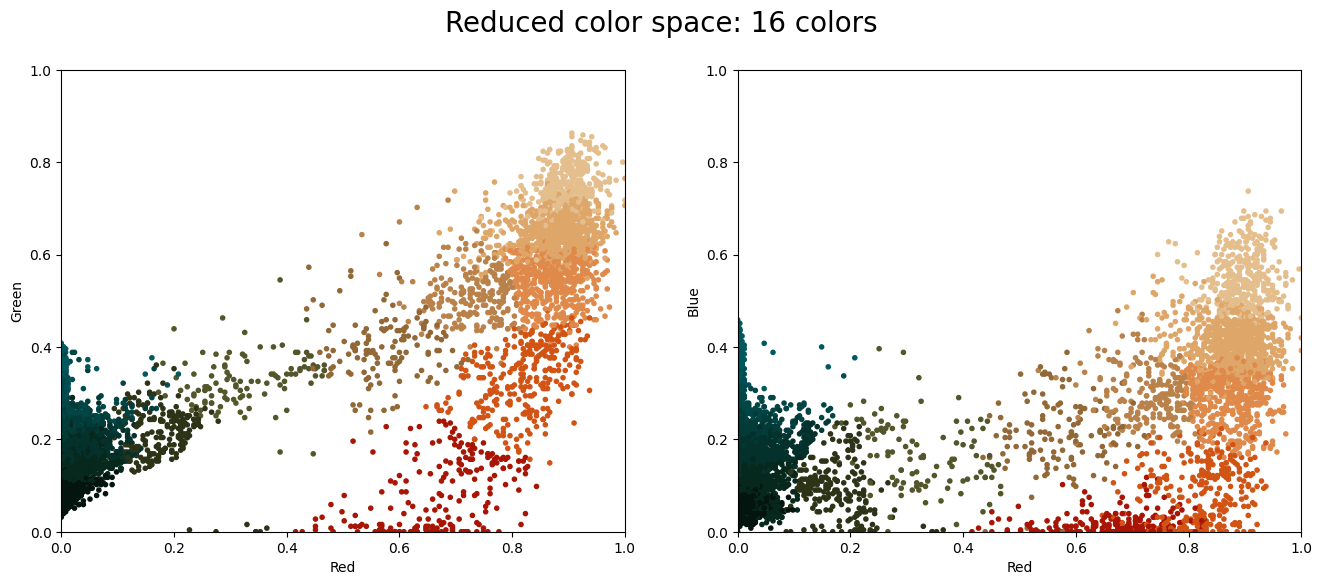

In [186]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

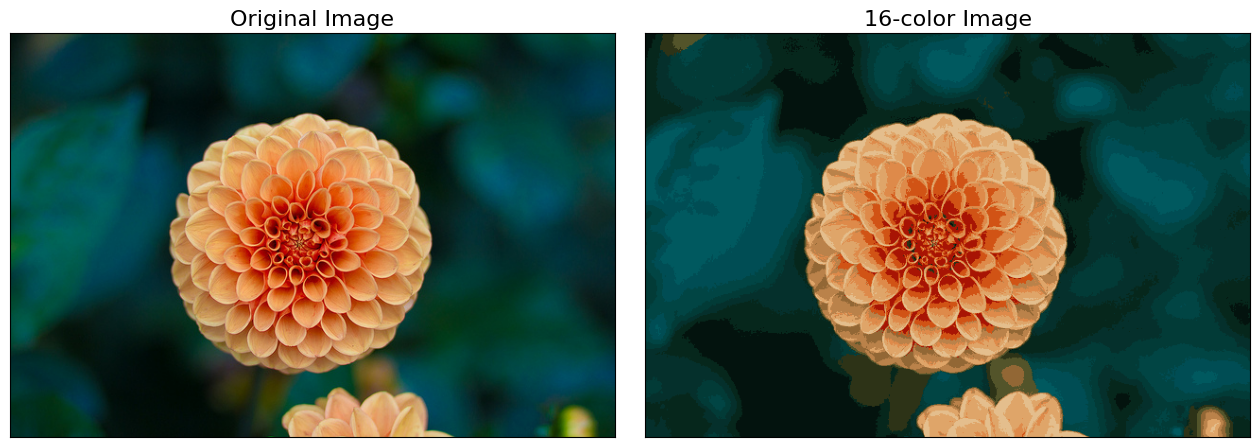

In [187]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# LAB ASSIGNMENT

**Question 1**

In [188]:
df_cc = pd.read_csv('/content/drive/MyDrive/MLearning/CC_Customer_Dataset.csv')

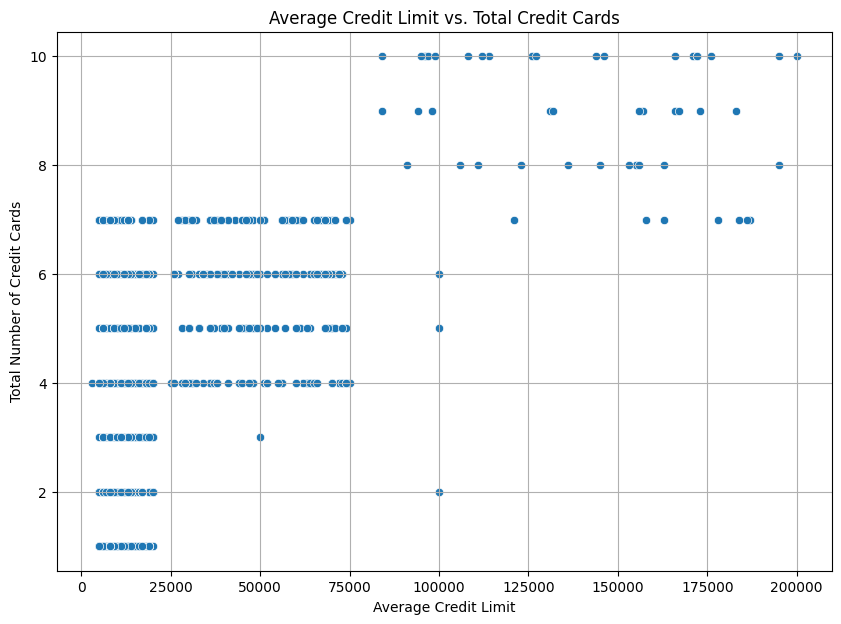

In [189]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_cc, x='Avg_Credit_Limit', y='Total_Credit_Cards')
plt.title('Average Credit Limit vs. Total Credit Cards')
plt.xlabel('Average Credit Limit')
plt.ylabel('Total Number of Credit Cards')
plt.grid(True)
plt.show()

No, the data cannot be considered linear since based on the plot, the data doesn't form the distinct isolated cloud. Instead, they form an overlapping horizontal bands

**Question 2**

In [190]:
X_cc = df_cc.iloc[:, 2:]
X_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


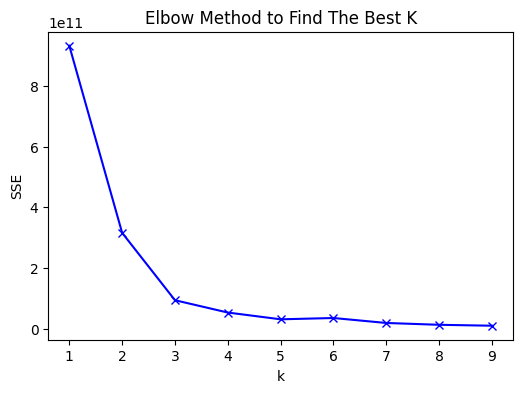

In [191]:
sse = []


K = range(1,10)


for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X_cc)
 sse.append(kmeanModel.inertia_)


plt.figure(figsize=(6,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

Based on the Elbow Method plot, the optimal number of clusters for this dataset is k=3. The plot shows a significant drop in the SSe as the number of clusters increases from 1 to 3. However, after k=3, the curve flattens out, forming a distinct 'elbow'. This indicates that adding more clusters beyond 3 provides diminishing returns, as the reduction in SSE becomes minimal.

**Question 3**

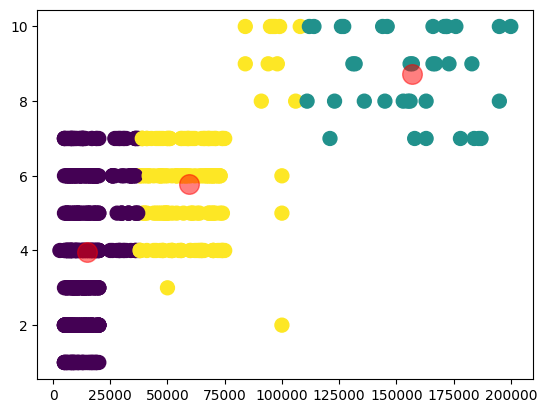

In [192]:
cl_kmeans = KMeans(n_clusters=3)
y_kmeans = cl_kmeans.fit_predict(X_cc)

plt.scatter(X_cc.iloc[:, 0], X_cc.iloc[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

**Question 4**

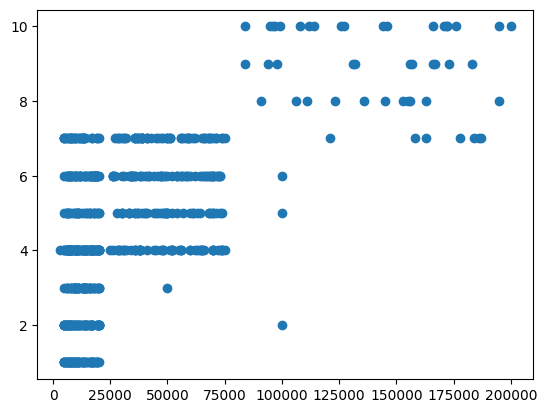

In [193]:
plt.scatter(X_cc.iloc[:, 0], X_cc.iloc[:, 1])

In [194]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cc)

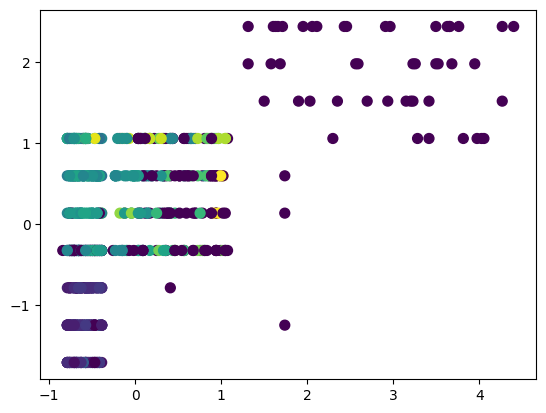

In [195]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

cluster_db_cc = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_db_cc, s=50, cmap='viridis')
plt.show()

It seems to be still messy and unreliable.

**Question 5**

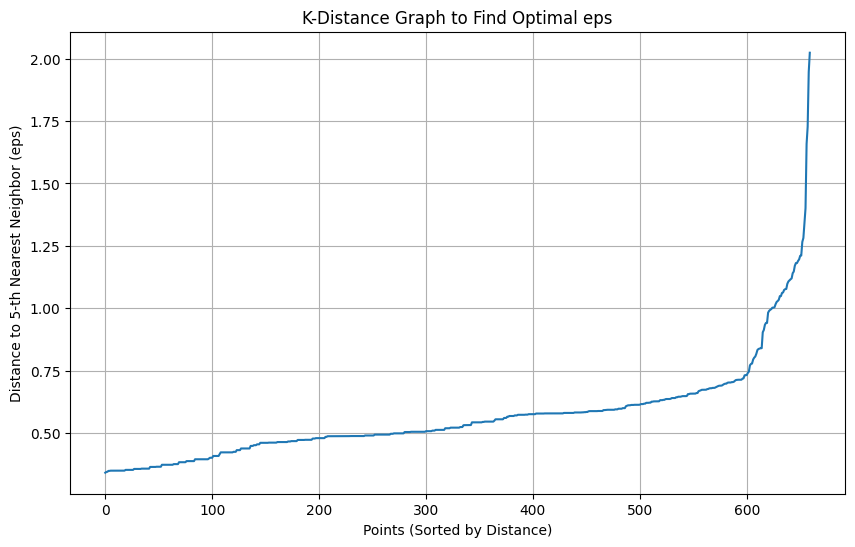

In [196]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

min_samples = 5

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

sorted_distances = np.sort(distances[:, min_samples-1])

plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.title('K-Distance Graph to Find Optimal eps')
plt.xlabel('Points (Sorted by Distance)')
plt.ylabel(f'Distance to {min_samples}-th Nearest Neighbor (eps)')
plt.grid(True)
plt.show()

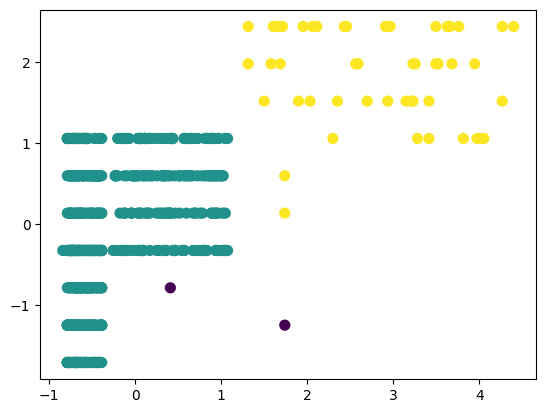

In [197]:
dbscan = DBSCAN(eps=1.3, min_samples=5)

cluster_db_cc = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_db_cc, s=50, cmap='viridis')
plt.show()

After doing DBSCAN again, we can see that there are 2 cluster and the purple dots are the noises. It is now more clearer

**Question 6**

In [198]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X_scaled, cluster_db_cc))


0.36060960687076654


In [199]:
from sklearn.metrics import davies_bouldin_score


db = davies_bouldin_score(X_scaled, cluster_db_cc)

print(f"Davies-Bouldin Index: {db}")


Davies-Bouldin Index: 1.4544776655444807
